# Module 2: Epidemic Modeling Template

## Team Members:
Vish and Christian
## Project Title:
Infection Modeling

## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*

Plotting Data Release #1

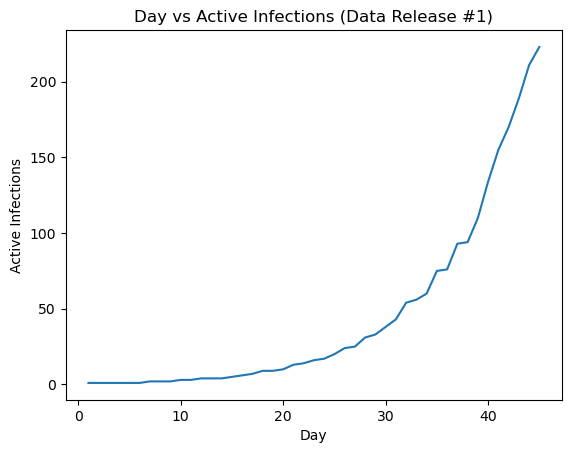

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get current working directory (notebook's directory)
script_dir = os.getcwd()

# Build path to Data folder
data_path = os.path.join(script_dir, "Data",
                         "mystery_virus_daily_active_counts_RELEASE#1.csv")

data = pd.read_csv(data_path, parse_dates=['date'])

plt.figure()
plt.plot(data["day"], data["active reported daily cases"])
plt.xlabel("Day")
plt.ylabel("Active Infections")
plt.title("Day vs Active Infections (Data Release #1)")
plt.show()

Initial infection rates are increasing very slowly, picking up speed only after around 20 days. We can measure how quickly it is spreading by taking the derivative of different points on the graph. In other words, we can use what we learned about ODE's, for example, Euler's method to model how fast the graph is growing, which represents infection rate. Things such as incubation rate, probability of infection upon encounters with an infected person, and days needed for recovery from the virus helps determine the outbreak curve. 

Estimate R0 for the mystery virus data using a fit to the exponential growth in I.

Estimated growth rate r: 0.1243889313025376
Estimated R0: 1.621944656512688


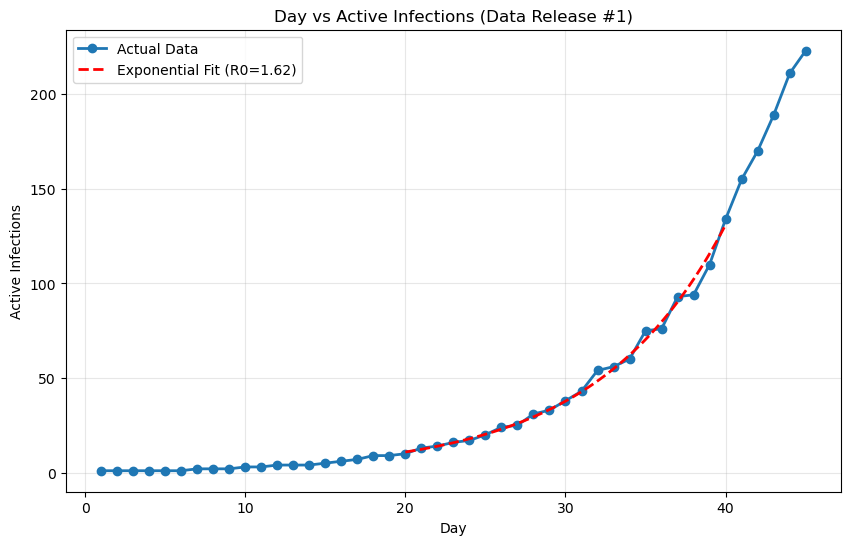

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get current working directory (notebook's directory)
script_dir = os.getcwd()

# Build path to Data folder
data_path = os.path.join(script_dir, "Data",
                         "mystery_virus_daily_active_counts_RELEASE#1.csv")

data = pd.read_csv(data_path, parse_dates=['date'])

# Select exponential window for R0 calculation
exp_data = data[(data['day'] >= 20) & (data['day'] <= 40)]

log_I = np.log(exp_data['active reported daily cases'])

slope, intercept = np.polyfit(exp_data['day'], log_I, 1)

r = slope
D = 5
R0 = 1 + r * D

# Generate fitted exponential curve
fitted_days = np.linspace(20, 40, 100)
fitted_I = np.exp(intercept + slope * fitted_days)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data["day"], data["active reported daily cases"], 'o-', label='Actual Data', linewidth=2)
plt.plot(fitted_days, fitted_I, 'r--', label=f'Exponential Fit (R0={R0:.2f})', linewidth=2)
plt.xlabel("Day")
plt.ylabel("Active Infections")
plt.title("Day vs Active Infections (Data Release #1)")
plt.legend()
plt.grid(True, alpha=0.3)

print("Estimated growth rate r:", r)
print("Estimated R0:", R0)

plt.show()

As you can see, 1.62 is a good R0 value to model the data. As a result, we think our R0 value is a very good estimate of our modeling. 

Viruses:
1. Marburg
- severe and often fatal viral hemorrhagic fever. It is caused by the Marburg virus which is related to the Ebola virus. Fatality rates are anywehere from 24% to 88% depending on level of medical care. It is transmitted through direct contact through broken skin or mucous membranes. 
2. Rabies
- Viral disease that is transmitted through rabid animal bites. The virus travels via peripheral nerves all the way to the brain. There, it causes rapid and fatal inflammation causing death. It has a short window to be cured with a vaccine due to how slowly it travels along the nerves, about 12-24 mm a day. 